In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('merged_data2.csv',encoding='utf-8')
df = df[['Title','pos','neg']]
df.head()

,Title,pos,neg
0,Ghosts of Mars,0.065,0.150
1,White Of The Eye,0.078,0.198
2,A Woman in Flames,0.100,0.065
3,The Sorcerer's Apprentice,0.092,0.131
4,Little city,0.089,0.108


In [3]:
print(max(df['pos']))
print(max(df['neg']))

0.57
0.597


In [10]:
from sklearn.cluster import KMeans
X = df[['pos','neg']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_

array([4, 1, 0, ..., 4, 2, 2])

In [11]:
df['k=5'] = kmeans.labels_
df.head(10)

,Title,pos,neg,k=2,k=3,k=4,k=5
0,Ghosts of Mars,0.065,0.150,1,0,1,4
1,White Of The Eye,0.078,0.198,1,0,2,1
2,A Woman in Flames,0.100,0.065,0,2,3,0
3,The Sorcerer's Apprentice,0.092,0.131,1,0,1,2
4,Little city,0.089,0.108,0,2,1,2
5,Henry V,0.065,0.032,0,2,3,0
6,Aaah Belinda,0.096,0.168,1,0,1,2
7,The Mechanical Monsters,0.091,0.075,0,2,3,0
8,Mary Poppins,0.109,0.082,0,2,3,2
9,Die Fahne von Kriwoj Rog,0.101,0.090,0,2,1,2


In [14]:
df.to_csv (r'merged_kmeans.csv', index = False, header=True)

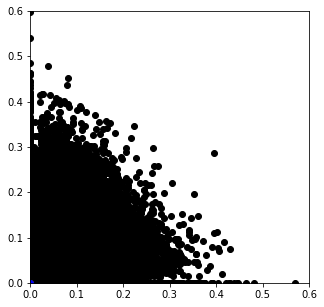

In [12]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0,1), np.random.randint(0, 1)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['pos'], df['neg'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, .6)
plt.ylim(0, .6)
plt.show()

In [ ]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['pos'] - centroids[i][0]) ** 2
                + (df['neg'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['pos'], df['neg'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, .6)
plt.ylim(0, .6)
plt.show()

In [ ]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['pos'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['neg'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['pos'], df['neg'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, .6)
plt.ylim(0, .6)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()